In [1]:
'''

Research question: 

What can we know from the COVID-19 data of each counties of United States?
What trends and patterns can we observe over time and across regions?


Characteristics of this dataset:

Live data -- updated everyday
Corresponds with map locations -- Chloropleth map


'''

'\n\nResearch question: \n\nWhat can we know from the COVID-19 data of each counties of United States?\nWhat trends and patterns can we observe over time and across regions?\n\n\nCharacteristics of this dataset:\n\nLive data -- updated everyday\nCorresponds with map locations -- Chloropleth map\n\n\n'

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [3]:
df.head(10)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599268 entries, 0 to 599267
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    599268 non-null  object 
 1   county  599268 non-null  object 
 2   state   599268 non-null  object 
 3   fips    593499 non-null  float64
 4   cases   599268 non-null  int64  
 5   deaths  599268 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 126.0 MB


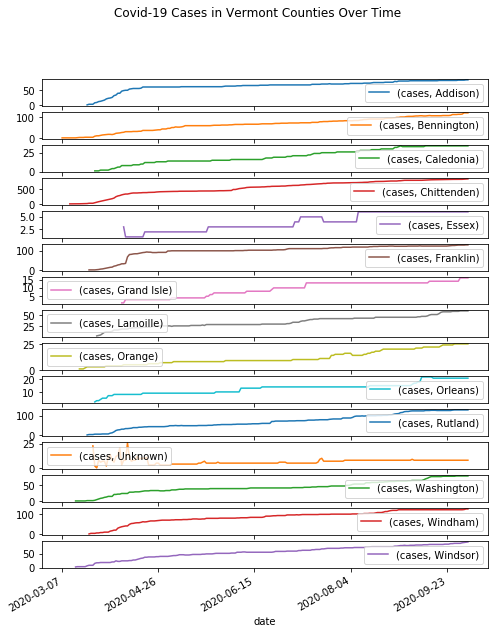

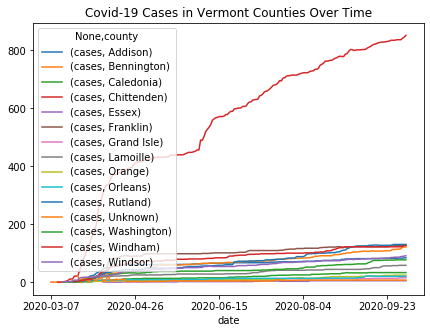

In [4]:
# plot for Vermont by county

vt = df[df['state'] == 'Vermont'][['date','county','cases']]

vt.set_index(['date','county']).unstack().plot(subplots=True,figsize = (8,10),
                                               title = 'Covid-19 Cases in Vermont Counties Over Time')
vt.set_index(['date','county']).unstack().plot(subplots=False,figsize = (7,5),
                                               title = 'Covid-19 Cases in Vermont Counties Over Time')
#vt.plot(figsize = (15,10))

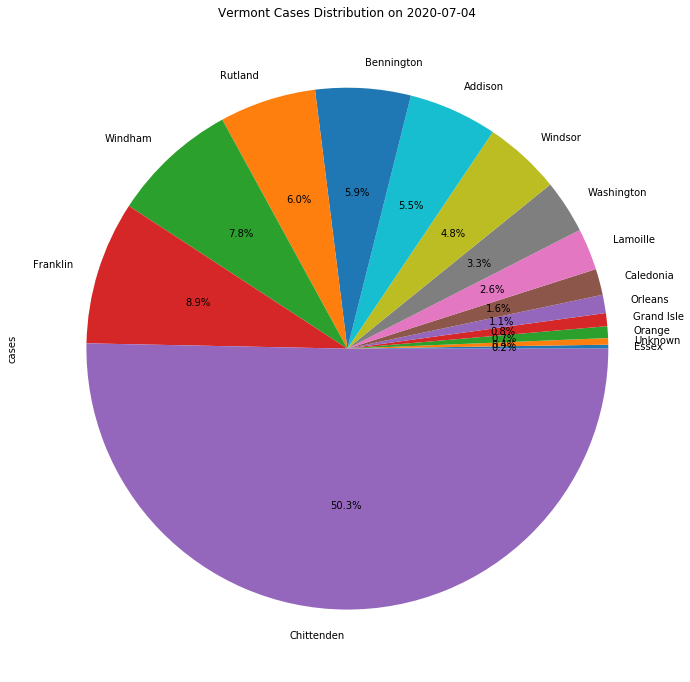

In [5]:
today = vt.set_index(['date','county']).loc['2020-07-04'].sort_values(by = 'cases')
today.plot.pie(y='cases',figsize = (15,12),title = 'Vermont Cases Distribution on 2020-07-04',autopct='%1.1f%%',legend = False)

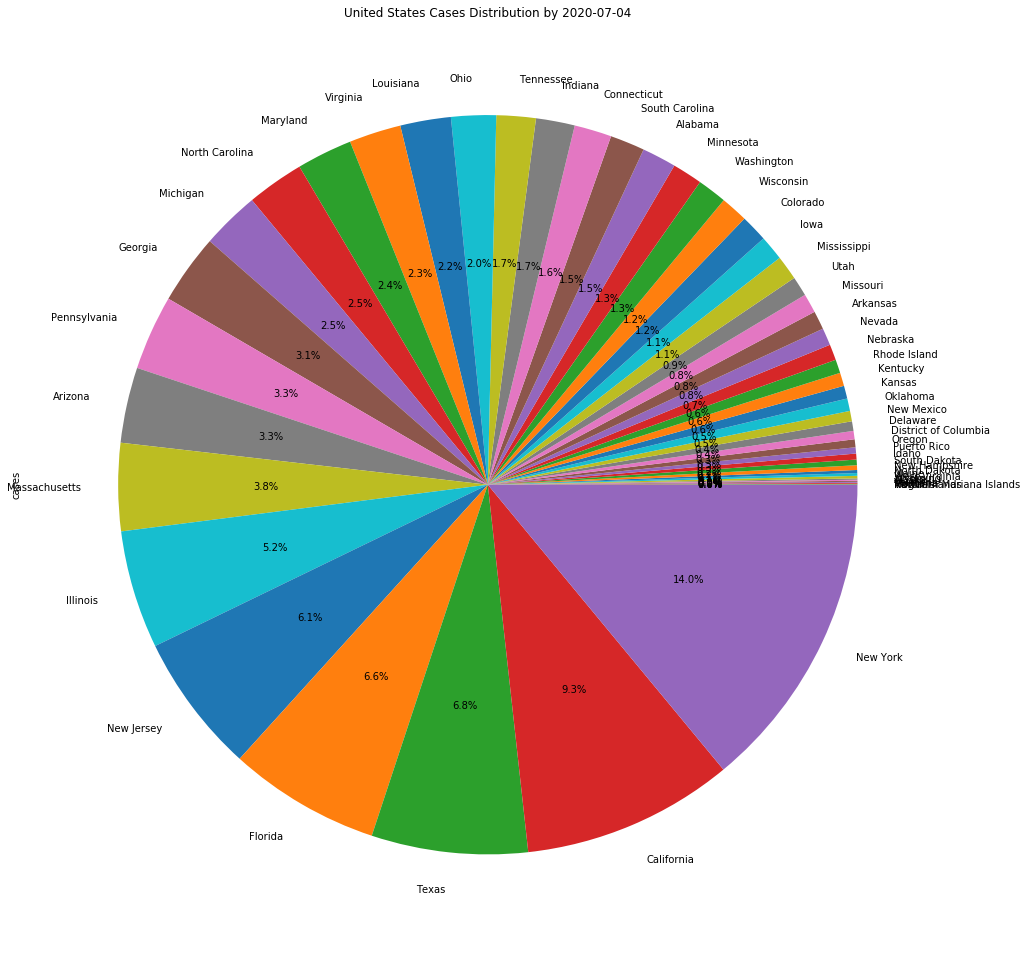

In [6]:
# state distribution of united states as of 2020-07-04

state_pie = df.set_index(['date']).loc['2020-07-04'].groupby('state').sum()[['cases']].sort_values('cases')
state_pie.plot.pie(y = 'cases',figsize = (20,17),title = 'United States Cases Distribution by 2020-07-04',autopct='%1.1f%%',legend = False)

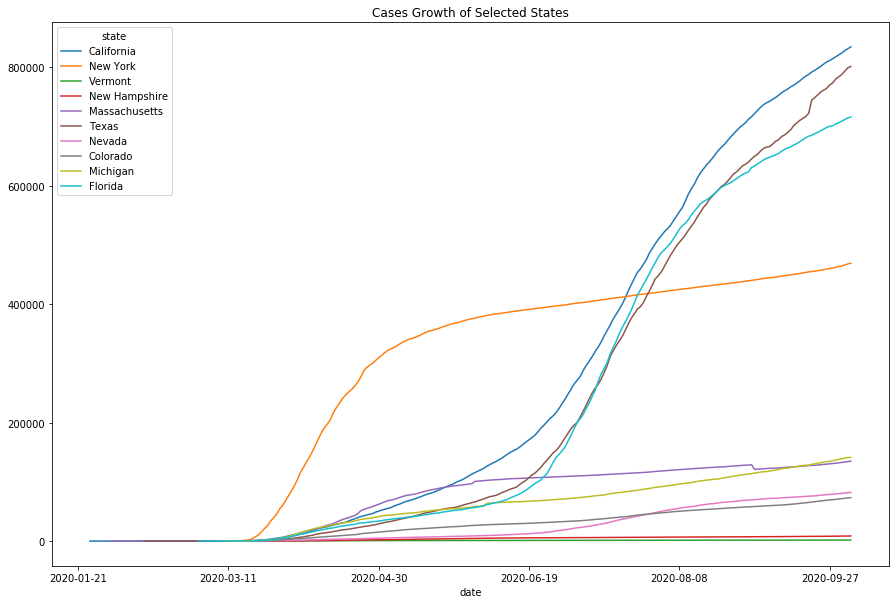

In [7]:
# Get rid of flips column since we don't seem to need it

counties = df[['date','county','state','cases']]

#counties[counties["state"]=='California'] # select rows from in terms of column values

#counties = counties.sort_values(['state','date'])

df1 = pd.DataFrame(counties.groupby(['date', 'state']).sum())

selected= ['California','New York','Vermont','New Hampshire','Massachusetts', 'Texas', 'Nevada', 'Colorado', 'Michigan','Florida']

df1 = df1.sort_values(['state','date']).unstack()

df1 = df1['cases'].loc[:,selected]

df1.plot(figsize = (15,10), title = 'Cases Growth of Selected States')

In [8]:
#dates = np.unique(counties['date'])
#states = np.unique(counties['state'])



# multiindex: both state and date are indices of new_counties
# https://www.datacamp.com/community/tutorials/pandas-multi-index

#counties.loc['2020-06-30'].sort_values('cases', ascending = False)

#fig=plt.figure(figsize=(50, 16), dpi= 80, facecolor='w', edgecolor='k')
df[df["state"]=='California']

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
15,2020-01-27,Orange,California,6059.0,1,0
...,...,...,...,...,...,...
596263,2020-10-04,Tulare,California,6107.0,16399,265
596264,2020-10-04,Tuolumne,California,6109.0,230,4
596265,2020-10-04,Ventura,California,6111.0,13150,153
596266,2020-10-04,Yolo,California,6113.0,2879,56


In [9]:
# Attempting to use Plotly, to plot Chropleth map of the united states based on dataframe

counties = df[['date','county','fips','cases','deaths','state']]

#counties = counties.set_index(pd.DatetimeIndex(df['date']), inplace=True) # set_index function resets the index using existing columns

hello2=df.set_index("state", drop = False)
#vm = counties.loc['2020-07-02']
#vm = vm[vm['state']=='Vermont'][['fips','cases','county']]
new = df[df['date'].isin(['2020-03-04','2020-04-04','2020-05-04','2020-06-04','2020-07-04'])]

In [10]:
#cali = counties.loc['2020-07-04']
#cali = cali[cali['state']=='California'][['fips','cases','county']]

In [17]:
# modify codes from https://plotly.com/python/mapbox-county-choropleth/
# https://plotly.com/python/animations/


'''from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties_loc = json.load(response)

fig = px.choropleth_mapbox(new, geojson=counties_loc, locations='fips', color='cases',
                           color_continuous_scale="OrRd",
                           range_color=(0, 150),
                           mapbox_style="carto-positron",
                           animation_frame="date",
                           animation_group="county",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.8,
                           labels={'cases':'Cases across 4 months'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()'''


'from urllib.request import urlopen\nimport json\nwith urlopen(\'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json\') as response:\n    counties_loc = json.load(response)\n\nfig = px.choropleth_mapbox(new, geojson=counties_loc, locations=\'fips\', color=\'cases\',\n                           color_continuous_scale="OrRd",\n                           range_color=(0, 150),\n                           mapbox_style="carto-positron",\n                           animation_frame="date",\n                           animation_group="county",\n                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},\n                           opacity=0.8,\n                           labels={\'cases\':\'Cases across 4 months\'}\n                          )\nfig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})\nfig.show()'

In [19]:

vt = df[df['state'] == 'New Hampshire'].sort_values(['county','date'])

fig = px.bar(vt, x="county", y="cases", color="county",
  animation_frame="date", animation_group="county", range_y=[0,1500])
fig.show()

import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)


In [14]:
# seaborn  https://seaborn.pydata.org/introduction.html

# sidetrack == which state has the most counties

#dic = {k: v for k, v in sorted(dic.items(), key=lambda item: len(item[1]), reverse = True)}